In [1]:
import numpy as np
from networkx import nx
from collections import defaultdict
from itertools import combinations

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import nxtriads as nx2 ## import modified functions

# Hilfsfunktionen

In [2]:
def find_double_edge(triad_edge_data):
    for i in triad_edge_data:
        for j in triad_edge_data:
            if (i[0]==j[1] and i[1]==j[0]):
                x = i[0]
                y = i[1]
    return x,y

def find_double_edge2(triad_edge_data):
    double_edges = []
    for i in triad_edge_data:
        for j in triad_edge_data:
            if (i[0]==j[1] and i[1]==j[0]):
                x = i[0]
                y = i[1]
                double_edges.append((x,y))
    return double_edges

def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup 



In [3]:
def triads_by_specific_types(G, my_types):
    """Returns a list of triads of pre-defined types in a directed graph.
    Parameters
    ----------
    G : digraph
       A NetworkX DiGraph
    Returns
    -------
    tri_by_type : dict
       Dictionary with triad types as keys and lists of triads as values.
    """
    all_tri = nx2.all_triads_mod(G) # modified function to skip if len < 3
    tri_by_type = defaultdict(list)
    for triad in all_tri:
        if (nx2.triad_type(triad) in my_types):
            name = nx2.triad_type(triad)
            tri_by_type[name].append(triad)
    return tri_by_type



def balance_for_2_semicycles(triad_edge_data):
    semicycle_balance = 1
    x, y = find_double_edge(triad_edge_data)
    positive_set = []
    negative_set = []
    
    # calculating balance/imbalance for both semicycles
    for edge in triad_edge_data:
        semicycle_balance *= (edge[2])['weight']
        
    for edge in triad_edge_data:
        if ((x == edge[0]) and (y == edge[1])):
            semicycle_balance_1 = semicycle_balance / ((edge[2])['weight'])
        if ((x == edge[1]) and (y == edge[0])):
            semicycle_balance_2 = semicycle_balance / ((edge[2])['weight'])
            
    # checking for both semicycles if balanced or imbalanced   
    if (semicycle_balance_1 > 0):
        positive_set.append(semicycle_balance_1)
    else:
        negative_set.append(semicycle_balance_1)
            
    if (semicycle_balance_2 > 0):
        positive_set.append(semicycle_balance_2)
    else:
        negative_set.append(semicycle_balance_2)
            
    triangle_balance = len(positive_set)/(len(positive_set) + len(negative_set))   # step 8 in algorithm             
    return triangle_balance


def semicycle_extraction(double_edges):
    triplets = combinations(double_edges, 3)
    triple = []
    cycles = []
    delete = []
    semicycles = []
    
    for triplet in triplets:
        triple.append(triplet)
        
    for i in range(len(triple)):
        if (Reverse((triple[i])[0]) in triple[i]):
            delete.append(triple[i])
        elif (Reverse((triple[i])[1]) in triple[i]):
            delete.append(triple[i])
        else:
            cycles.append(triple[i])
            
    nodes = []
    for tuples in cycles[0]:
        nodes.append(tuples[0])
        nodes.append(tuples[1])
    unique_nodes = np.unique(nodes)

    a = unique_nodes[0]
    b = unique_nodes[1]
    c = unique_nodes[2]
            
    for cycle in cycles:
        if ((a,b) in cycle and (b,c) in cycle and (c,a) in cycle):
            delete.append(cycle)
        elif ((b,a) in cycle and (c,b) in cycle and (a,c) in cycle):
            delete.append(cycle)
        else:
            semicycles.append(cycle)

    return semicycles



def balance_for_triad_type_300(triad_edge_data):
    semicycle_balance = 1
    double_edges = find_double_edge2(triad_edge_data)
    semicycles = semicycle_extraction(double_edges)
    
    positive_set = []
    negative_set = []    
    
    #for semicycle in semicycles:
    #    semi
    
    
    for cycle in semicycles:
        semicycle_balance = 1
        for i in range(3):
            for edge in triad_edge_data:
                if (cycle[i] == (edge[0], edge[1])):
                    semicycle_balance *= edge[2]['weight']
        if semicycle_balance > 0:
            positive_set.append(semicycle_balance)
        else:
            negative_set.append(semicycle_balance)
            
    triangle_balance = len(positive_set)/(len(positive_set) + len(negative_set))   # step 8 in algorithm             
    return triangle_balance

# Balance Ratio Function

In [11]:
def balance_ratio(graph):
    my_types = {'030T', '120D', '120U', '300'}
    triads = triads_by_specific_types(graph, my_types)
    count = 0
    
    sum_balance_030T = 0
    sum_balance_120D = 0
    sum_balance_120U = 0
    sum_balance_300  = 0
    
    rel_triads = {k:v for (k,v) in triads.items() if k in my_types}
    
    for triad_type in my_types:
        for i in range(len(triads[triad_type])):
            
            if (triad_type == '030T'):
                edge_data = ((triads['030T'])[i]).edges(data = True)
                semicycle_balance_030T = 1
                for edge in edge_data:
                    semicycle_balance_030T *= (edge[2])['weight']
                if (semicycle_balance_030T > 0):
                    sum_balance_030T += 1
                else:
                    sum_balance_030T += 0
                
            elif (triad_type == '120D'):
                edge_data = ((triads['120D'])[i]).edges(data = True)
                triangle_balance_120D = balance_for_2_semicycles(edge_data)
                
                sum_balance_120D += triangle_balance_120D
                
            elif (triad_type == '120U'):
                edge_data = ((triads['120U'])[i]).edges(data = True)
                triangle_balance_120U = balance_for_2_semicycles(edge_data)
                
                sum_balance_120U += triangle_balance_120U
                
            elif (triad_type == '300'):
                edge_data = ((triads['300'])[i]).edges(data = True)
                triangle_balance_300 = balance_for_triad_type_300(edge_data)
                
                sum_balance_300 += triangle_balance_300
            
    if len(triads['030T']) > 0:
        overall_balance_030T = sum_balance_030T / len(triads['030T'])
        count += 1
    else: 
        overall_balance_030T = 0
        
    if len(triads['120D']) > 0:
        overall_balance_120D = sum_balance_120D / len(triads['120D'])
        count += 1
    else: 
        overall_balance_120D = 0
        
    if len(triads['120U']) > 0:
        overall_balance_120U = sum_balance_120U / len(triads['120U'])
        count += 1
    else: 
        overall_balance_120U = 0
        
    if len(triads['300']) > 0:
        overall_balance_300 = sum_balance_300 / len(triads['300'])
        count += 1
    else: 
        overall_balance_300 = 0
    
    average_overall_balance = (overall_balance_030T + overall_balance_120D + overall_balance_120U + overall_balance_300) / count

    return average_overall_balance, rel_triads
    
    

# Example Testgraph

In [2]:
#edgesAfter = pd.read_csv("../data/test.csv")
edgesAfter = pd.read_csv("../data/votes_to_comments_after.csv")

In [3]:
G = nx.from_pandas_edgelist(edgesAfter, 
                            source='source', 
                            target='target', 
                            edge_attr = 'weight',
                            create_using=nx.DiGraph())

In [ ]:
# fig = plt.figure(figsize=(50,50))
# nx.draw_spring(G)
# plt.show()

In [8]:
x = nx.triadic_census(G)
x

{'003': 6,
 '012': 17,
 '102': 11,
 '021D': 1,
 '021U': 1,
 '021C': 2,
 '111D': 9,
 '111U': 2,
 '030T': 2,
 '030C': 0,
 '201': 1,
 '120D': 2,
 '120U': 1,
 '120C': 0,
 '210': 0,
 '300': 1}

In [9]:
balance_ratio(G)

0.8125

# Full Dataset runs

In [ ]:
# ## quickstart
# import numpy as np
# from networkx import nx

# import pandas as pd
# import datetime
# import matplotlib.pyplot as plt
# from numpy.linalg import matrix_power

# edgesBefore = pd.read_csv("../data/edges_before.csv")
# edgesAfter = pd.read_csv("../data/edges_after.csv")

In [5]:
edgesBefore = pd.read_csv("../data/edges_before.csv")
edgesAfter = pd.read_csv("../data/edges_after.csv")

G = nx.from_pandas_edgelist(edgesAfter, 
                            source='source', 
                            target='target', 
                            edge_attr = 'weight',
                            create_using=nx.DiGraph())

In [6]:
# read before
A3di_before_df = pd.read_csv("../dicts/A3di_before.csv", index_col=0)
A3di_b = A3di_before_df['0'].to_dict()
# read after
A3di_after_df = pd.read_csv("../dicts/A3di_after.csv", index_col=0)
A3di = A3di_after_df['0'].to_dict()
print(len(A3di.keys()), len(A3di_b.keys()))

14830 9861


In [7]:
## possibly filter for value > k
A3di_mini = {k:v for k,v in A3di.items() if v > 6}
len(A3di_mini)
Gmini = G.subgraph(A3di_mini.keys()).copy()

In [14]:
len(A3di_mini)

12081

In [8]:
nx.triadic_census(Gmini)

{'003': 3855511,
 '012': 40306,
 '102': 1767,
 '021D': 233,
 '021U': 561,
 '021C': 272,
 '111D': 154,
 '111U': 32,
 '030T': 28,
 '030C': 0,
 '201': 9,
 '120D': 14,
 '120U': 4,
 '120C': 2,
 '210': 2,
 '300': 0}

## Calc Balance after

In [12]:
#balance_after = balance_ratio(Gmini)
average_overall_balance, rel_triads = balance_ratio(Gmini)

In [13]:
average_overall_balance

0.8214285714285715

In [ ]:
#rel_triads

## Before

In [8]:
G_b = nx.from_pandas_edgelist(edgesBefore, 
                            source='source', 
                            target='target', 
                            edge_attr = 'weight',
                            create_using=nx.DiGraph())

In [9]:
A3di_b_mini = {k:v for k,v in A3di_b.items() if v > 0}
len(A3di_b_mini)
G_b_mini = G_b.subgraph(A3di_b_mini.keys()).copy()

In [60]:
nx.triadic_census(G_b)

{'003': 420984678918,
 '012': 3527219586,
 '102': 66810340,
 '021D': 18163006,
 '021U': 16312507,
 '021C': 12070855,
 '111D': 1366147,
 '111U': 1403301,
 '030T': 1062956,
 '030C': 28674,
 '201': 65203,
 '120D': 76222,
 '120U': 89748,
 '120C': 42411,
 '210': 20469,
 '300': 1766}

In [10]:
nx.triadic_census(G_b_mini)
    

{'003': 1044868,
 '012': 10079,
 '102': 178,
 '021D': 50,
 '021U': 31,
 '021C': 27,
 '111D': 5,
 '111U': 1,
 '030T': 1,
 '030C': 0,
 '201': 0,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

In [12]:
balance_before = balance_ratio(G_b_mini)

In [13]:
balance_before

0.25

## Extract nodes for plotting

In [ ]:
def balance_ratio_test(graph):
    my_types = {'030T', '120D', '120U', '300'}
    triads = triads_by_specific_types(graph, my_types)
    
    sum_balance_030T = 0
    sum_balance_120D = 0
    sum_balance_120U = 0
    sum_balance_300 = 0
    
    rel_triads = {k:v for (k,v) in triads.items() if k in my_types}
    
    return rel_triads

rel_triads = balance_ratio_test(Gmini)

In [15]:
nodes = {}
rel = []
rels = set()
for k,v in rel_triads.items():
    #if type(v) is not None:
        for i, tri in enumerate(v):
            #print(tri.nodes)
            nodes[i] = list(tri.nodes)
            rel.append(list(tri.nodes))
            for idx in list(tri.nodes):
                rels.add(idx)
    #nodes = nodes.append(v.nodes())

#nodes.values()
len(rels)

28

In [7]:
rels = [18563,
 3976,
 8982,
 3479,
 2968,
 5658,
 4640,
 5409,
 3499,
 9388,
 4145,
 6585,
 8633,
 13120,
 2373,
 8008,
 13770,
 10705,
 6101,
 14421,
 5464,
 17755,
 9436,
 1264,
 10741,
 1782,
 8570,
 1277]

Gmicro = Gmini.subgraph(rels).copy()
Gmicro_adj = nx.to_numpy_matrix(Gmicro)
Gmicro_adj.shape
pd.DataFrame(Gmicro_adj).to_csv(index=None)

(28, 28)

In [ ]:
Gmicro_adj = pd.read_csv("../dicts/rel_edges_matrix.csv")
#test
Gmicro_adj.shape

In [10]:
len(Gmicro.edges)

73

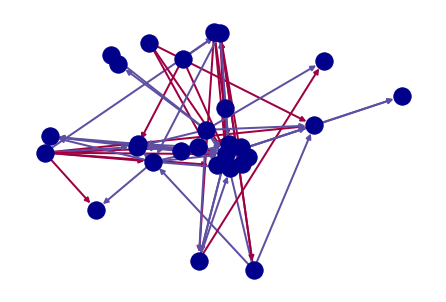

In [8]:
edges,weights = zip(*nx.get_edge_attributes(Gmicro,'weight').items())
nx.draw(Gmicro,  node_color='darkblue', edgelist=edges, edge_color=weights, width=2.0, edge_cmap=plt.cm.Spectral)